In [1]:
from deap import base, creator, tools, algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [3]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

In [4]:
# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print Hall of Fame info:
    print("Hall of Fame Individuals = ", *hof.items, sep="\n")
    print("Best Ever Individual = ", hof.items[0])

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')

    plt.show()

gen	nevals	max	avg    
0  	400   	65 	50.2475
1  	362   	65 	54.5125
2  	356   	67 	57.6875
3  	381   	70 	60.935 
4  	350   	73 	63.59  
5  	362   	76 	66.135 
6  	366   	78 	68.6175
7  	350   	82 	71.065 
8  	359   	82 	73.7575
9  	357   	83 	76.22  
10 	365   	85 	78.46  
11 	368   	89 	80.35  
12 	369   	90 	82.395 
13 	358   	91 	83.9325
14 	360   	93 	85.785 
15 	361   	93 	87.65  
16 	382   	94 	89.2125
17 	379   	95 	90.565 
18 	362   	95 	91.76  
19 	365   	96 	92.82  
20 	367   	98 	93.9575
21 	360   	99 	94.955 
22 	370   	100	95.6925
23 	372   	100	96.615 
24 	365   	100	97.5025
25 	367   	100	98.395 
26 	367   	100	99.035 
27 	376   	100	99.5925
28 	358   	100	99.8625
29 	371   	100	99.8825
30 	375   	100	99.8875
31 	358   	100	99.9225
32 	351   	100	99.8825
33 	348   	100	99.9125
34 	365   	100	99.865 
35 	360   	100	99.89  
36 	371   	100	99.865 
37 	363   	100	99.875 
38 	355   	100	99.9125
39 	372   	100	99.945 
40 	366   	100	99.87  
41 	357   	100	99.865 
42 	360   	

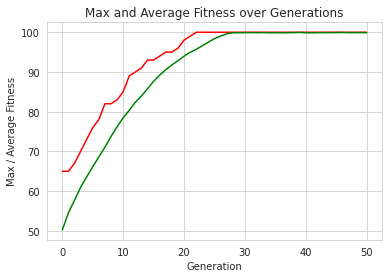

In [5]:
if __name__ == "__main__":
    main()